In [1]:
import pandas as pd
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
import os
# pd.set_option("display.max_rows", 100, "display.max_columns",100)

In [2]:
file = os.listdir('./tech_data')

### 求covariance matrix的eigenvalue(PCA)，選最大的5條eigenvector做為基底，降維

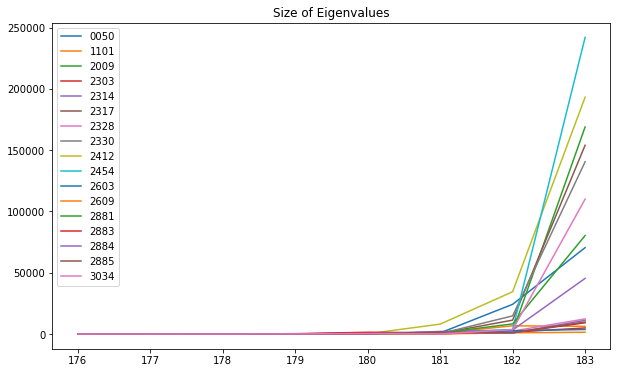

In [3]:
plt.figure(figsize = (10,6))
for filename in file:
    df = pd.read_csv("./tech_data/%s"%filename,encoding = 'utf-8',thousands=',',index_col = 'date')
    data = df[['open','high','low','close','volume']]
    df_pca = (df - df.mean(axis = 0)) / (df.var(axis = 0)+1e-6) ##Normalize
    cov = df_pca.cov()
    egval , egvec = LA.eigh(cov) ##solve eigenvalues
    dff = pd.DataFrame([np.dot(df_pca,egvec[-i]) for i in range(5,0,-1)]).transpose()  ## projection 
    dff.columns = [f"PCA_{i}" for i in range(1,6)] ##rename the columns
    dff = pd.concat([data,dff.set_index(data.index)] ,axis = 1)
    
    #dff.to_csv('./data_final/final_%s'%filename[5:],encoding = 'utf-8-sig') ##save

    ##plot the difference between eigenvalues
    egval_diff = pd.DataFrame(egval).shift(-1) - pd.DataFrame(egval)
    plt.plot(egval_diff[176:],label = filename[-8:-4])
plt.title('Size of Eigenvalues')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.legend(loc='upper left',fontsize = 10)